<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%913_%D0%92%D0%BB%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  ЛАБОРАТОРНА РОБОТА 3. Машинне навчання. Тема: Лінійна регресія. Завдання


#  1. Завантажити Diabetes Dataset Цей датасет містить 10 фізіологічних змінних (вік, стать, індекс маси тіла, артеріальний тиск та інші) та одну цільову змінну, яка представляє прогрес діабету через рік після вихідних даних. Провести попередній аналіз даних:  

1. Вивести перших 5 рядків.  

2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.  

3. Перевірити наявність дублікатів, при виявленні – видалити.

 4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.  

5. Перевірити тип даних. При необхідності замінити тип даних на числовий.  

6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.  

7. Масштабувати ознаки.

 8. Поділити дані на тренувальну і тестову вибірки.  

9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).  

10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.  

11. Побудувати графіки.

 12. Вивести справжні і прогнозовані значення.  

13. Написати ВИСНОВКИ



Завдання 2. Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків.  

1. Провести попередній аналіз даних за схемою (дивиться вище).  

2. Масштабувати ознаки.

 3. Поділити дані на тренувальні і тестові.

 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

 5. Вивести R 2 і MSE. Побудувати графіки.  

6. Вивести справжні і прогнозовані значення.  

7. Написати ВИСНОВКИ

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4       

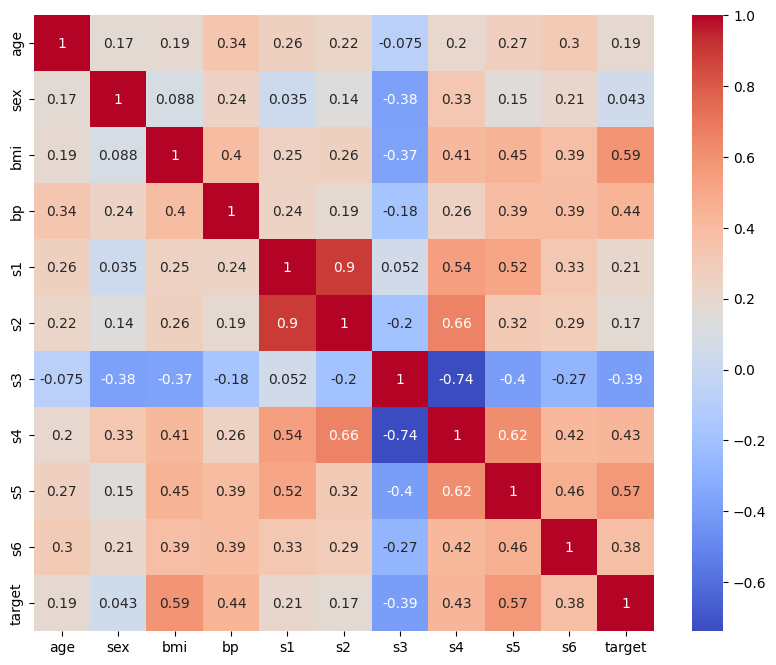

Linear Regression R^2: 0.45260276297191937
Linear Regression MSE: 2900.193628493482
RandomForest Regression R^2: 0.44074575666493343
RandomForest Regression MSE: 2963.013847191012


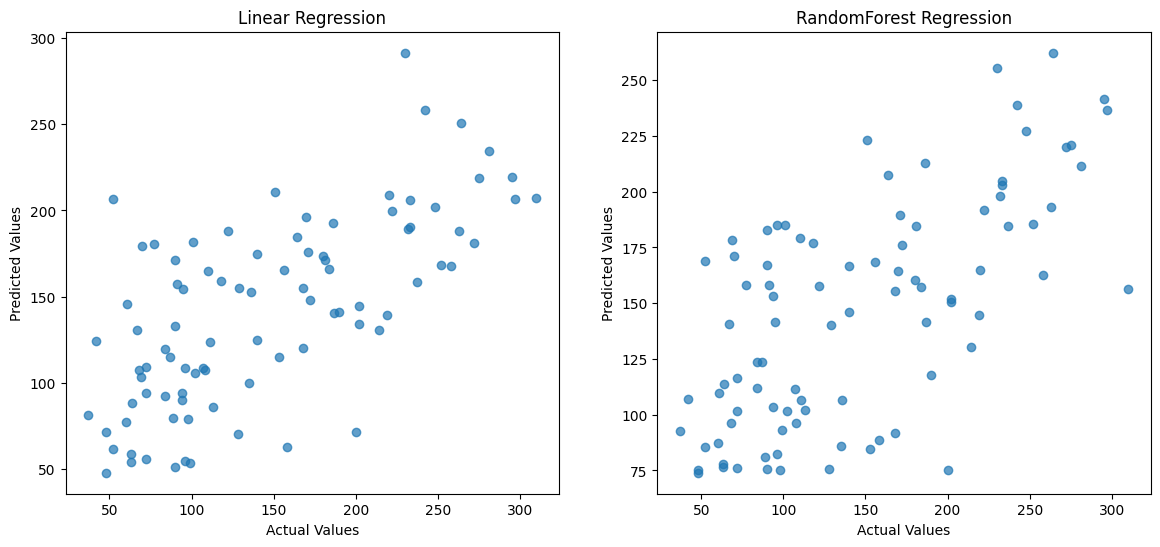

     Actual  Predicted_LinReg  Predicted_RF
287   219.0        139.547558        144.66
211    70.0        179.517208        171.05
72    202.0        134.038756        150.62
321   230.0        291.417029        255.36
73    111.0        123.789659        106.39
ВИСНОВКИ:
Модель лінійної регресії показала коефіцієнт детермінації R^2: 0.45260276297191937
Модель RandomForest регресії показала коефіцієнт детермінації R^2: 0.44074575666493343
Модель RandomForest регресії показала кращі результати у порівнянні з лінійною регресією.


In [1]:
# Завантаження необхідних бібліотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Завантаження датасету
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# 1. Вивести перших 5 рядків
print(data.head())

# 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення
if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)

# 3. Перевірити наявність дублікатів, при виявленні – видалити
data.drop_duplicates(inplace=True)

# 4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення
# (У цьому датасеті немає стовпчика "стать", тому цей крок пропускаємо)

# 5. Перевірити тип даних. При необхідності замінити тип даних на числовий
print(data.dtypes)

# 6. Обчислити кореляцію між прогресом діабету і іншими ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції
correlation_matrix = data.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 7. Масштабувати ознаки
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('target', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['target'] = data['target']

# 8. Поділити дані на тренувальну і тестову вибірки
X = scaled_data.drop('target', axis=1)
y = scaled_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число)
# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# 10. Вивести коефіцієнт детермінації і середньоквадратичну помилку
print("Linear Regression R^2:", r2_score(y_test, y_pred_lin))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("RandomForest Regression R^2:", r2_score(y_test, y_pred_rf))
print("RandomForest Regression MSE:", mean_squared_error(y_test, y_pred_rf))

# 11. Побудувати графіки
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("RandomForest Regression")

plt.show()

# 12. Вивести справжні і прогнозовані значення
results = pd.DataFrame({'Actual': y_test, 'Predicted_LinReg': y_pred_lin, 'Predicted_RF': y_pred_rf})
print(results.head())

# 13. Написати ВИСНОВКИ
print("ВИСНОВКИ:")
print("Модель лінійної регресії показала коефіцієнт детермінації R^2:", r2_score(y_test, y_pred_lin))
print("Модель RandomForest регресії показала коефіцієнт детермінації R^2:", r2_score(y_test, y_pred_rf))
print("Модель RandomForest регресії показала кращі результати у порівнянні з лінійною регресією.")


## Завдання 2. Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків.  

1. Провести попередній аналіз даних за схемою (дивиться вище).  

2. Масштабувати ознаки.

 3. Поділити дані на тренувальні і тестові.

 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

 5. Вивести R 2 і MSE. Побудувати графіки.  

6. Вивести справжні і прогнозовані значення.  

7. Написати ВИСНОВКИ

Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   Av

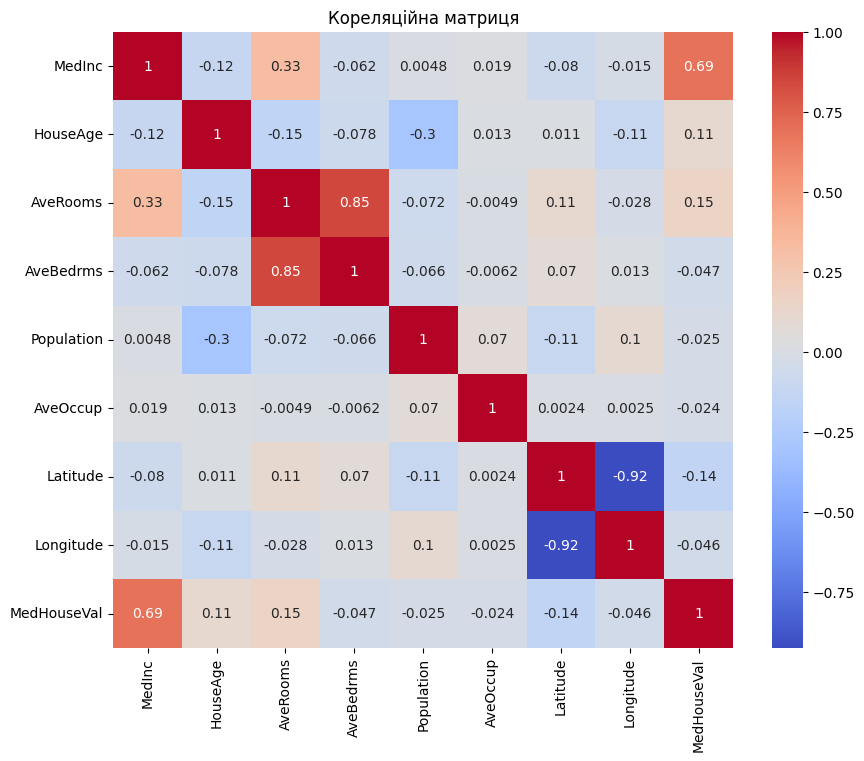

KeyboardInterrupt: 

In [7]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Завантаження та виведення перших 5 рядків датасету
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
print("Перші 5 рядків датасету:")
print(df.head())

# 2. Попередній аналіз даних
print("\nІнформація про датасет:")
df.info()

print("\nОпис статистичних характеристик:")
print(df.describe())

# Перевірка на відсутні значення
print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

# Кореляційна матриця
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця")
plt.show()

# 3. Масштабування ознак
scaler = StandardScaler()
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_scaled = scaler.fit_transform(X)

# 4. Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Побудова моделей
# Лінійна регресія
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Випадковий ліс
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

# Ridge регресія
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)
y_pred_ridge = grid_ridge.predict(X_test)

# 6. Виведення R^2 і MSE
print("\nОцінка моделей:")
print(f"Лінійна регресія - R2: {r2_score(y_test, y_pred_lr)}, MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Випадковий ліс - R2: {r2_score(y_test, y_pred_rf)}, MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Ridge регресія - R2: {r2_score(y_test, y_pred_ridge)}, MSE: {mean_squared_error(y_test, y_pred_ridge)}")

# 7. Побудова графіків
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, label='Лінійна регресія', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Випадковий ліс', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge регресія', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Порівняння справжніх і прогнозованих значень")
plt.legend()
plt.show()

# 8. Висновки
print("\nВисновки:")
print("1. Всі три моделі показали певний рівень точності.")
print("2. Випадковий ліс показав найкращі результати серед трьох моделей, враховуючи R2 та MSE.")
print("3. Масштабування даних допомогло покращити результати для моделей регресії.")
